In [95]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [8]:
base_path = '/home/annierosen16/data/era5sgp/era5_sl_hourly_precip_full_sgp'

file_pattern = f"{base_path}/20*"

file_list = glob.glob(file_pattern)

p_era = xr.open_mfdataset(file_list, combine='by_coords', chunks={'time': 24})

eradf = p_era.assign_coords(valid_time=p_era.valid_time - pd.Timedelta(hours=6))

In [12]:
eratp = eradf['tp'].load().data * 1000

eratimes = eradf['valid_time'].data

eralats = eradf['latitude'].data

eralons = eradf['longitude'].data

In [38]:
def is_ape(precip, times, latitude, longitude):
    
    # put arrays into a df 
    
    df = pd.DataFrame({'precip': precip, 'time': times})
    
    df['date'] = df['time'].dt.date
    
    df['hour'] = df['time'].dt.hour
    
    # adjusting times so that the 0th hour is labeled as the 24th of the previous day
    # purpose is to calculate evening precipitation more easily 
    
    df.loc[df['hour'] == 0, 'hour'] = 24
    
    df.loc[df['hour'] == 24, 'date'] = df['date'] - pd.Timedelta(days=1)

    results = []
    
    for date, group in df.groupby('date'):
        
        num_hours = len(group['hour'].values)
        
        if num_hours == 24:
        
            group = group.reset_index(drop=True)

            morning_precip = group[(group['hour'] >= 6) & (group['hour'] <= 13)]['precip'].sum()

            afternoon_precip = group[(group['hour'] >= 14) & (group['hour'] <= 20)]['precip'].sum()

            evening_precip = group[(group['hour'] >= 21) & (group['hour'] <= 24)]['precip'].sum()

            condition_1 = afternoon_precip >= 2 * morning_precip

            condition_2 = afternoon_precip > evening_precip

            peak_hour = group.iloc[group['precip'].idxmax()]['hour']

            peak_in_afternoon = 14 <= peak_hour <= 20 

            condition_3 = peak_in_afternoon 

            daily_precip = group['precip'].values 

            if condition_1 and condition_2 and condition_3:

                results.append((date, lat, lon, True, daily_precip, np.nan))

            else:

                failed_conditions = []

                if not condition_1:

                    failed_conditions.append("morning precipitation < 2x afternoon precipitation")

                if not condition_2: 

                    failed_conditions.append("afternoon precipitation < evening precipitation: ")

                if not condition_3: 

                    failed_conditions.append("peak precipitation hour not in afternoon")

                results.append((date, lat, lon, False, daily_precip, failed_conditions))
                
        else: 
                        
            results.append((date, lat, lon, False, np.nan, "not enough hours to determine"))

    return results

In [50]:
# tp = eratp[:, 10, 30]
        
# lat = eralats[10]
        
# lon = eralons[30]
        
# print("beginning APE counts for: ", lat, lon)
        
# apes_result = is_ape(tp, eratimes, lat, lon)

# annie_apes = pd.DataFrame(apes_result, columns=['date', 'lat','lon','APE', 'daily_precip', 'reason_for_fail'])

beginning APE counts for:  36.5 -97.5


In [56]:
# process: run is_ape over every latitude & longitude pair

full_domain_ape_results = []

latitude_indices = eratp.shape[1]

longitude_indices = eratp.shape[2]

for latidx in range(latitude_indices):
    
    for lonidx in range(longitude_indices):
        
        tp = eratp[:, latidx, lonidx]
        
        lat = eralats[latidx]
        
        lon = eralons[lonidx]
        
        print("beginning APE counts for: ", lat, lon)
        
        apes_result = is_ape(tp, eratimes, lat, lon)
        
        for row in apes_result:
            
            date, lat, lon, ape_flag, daily_precip, reason = row
            
            full_domain_ape_results.append((date, lat, lon, ape_flag, daily_precip, reason))
        

beginning APE counts for:  39.0 -105.0
beginning APE counts for:  39.0 -104.75
beginning APE counts for:  39.0 -104.5
beginning APE counts for:  39.0 -104.25
beginning APE counts for:  39.0 -104.0
beginning APE counts for:  39.0 -103.75
beginning APE counts for:  39.0 -103.5
beginning APE counts for:  39.0 -103.25
beginning APE counts for:  39.0 -103.0
beginning APE counts for:  39.0 -102.75
beginning APE counts for:  39.0 -102.5
beginning APE counts for:  39.0 -102.25
beginning APE counts for:  39.0 -102.0
beginning APE counts for:  39.0 -101.75
beginning APE counts for:  39.0 -101.5
beginning APE counts for:  39.0 -101.25
beginning APE counts for:  39.0 -101.0
beginning APE counts for:  39.0 -100.75
beginning APE counts for:  39.0 -100.5
beginning APE counts for:  39.0 -100.25
beginning APE counts for:  39.0 -100.0
beginning APE counts for:  39.0 -99.75
beginning APE counts for:  39.0 -99.5
beginning APE counts for:  39.0 -99.25
beginning APE counts for:  39.0 -99.0
beginning APE cou

beginning APE counts for:  37.75 -104.25
beginning APE counts for:  37.75 -104.0
beginning APE counts for:  37.75 -103.75
beginning APE counts for:  37.75 -103.5
beginning APE counts for:  37.75 -103.25
beginning APE counts for:  37.75 -103.0
beginning APE counts for:  37.75 -102.75
beginning APE counts for:  37.75 -102.5
beginning APE counts for:  37.75 -102.25
beginning APE counts for:  37.75 -102.0
beginning APE counts for:  37.75 -101.75
beginning APE counts for:  37.75 -101.5
beginning APE counts for:  37.75 -101.25
beginning APE counts for:  37.75 -101.0
beginning APE counts for:  37.75 -100.75
beginning APE counts for:  37.75 -100.5
beginning APE counts for:  37.75 -100.25
beginning APE counts for:  37.75 -100.0
beginning APE counts for:  37.75 -99.75
beginning APE counts for:  37.75 -99.5
beginning APE counts for:  37.75 -99.25
beginning APE counts for:  37.75 -99.0
beginning APE counts for:  37.75 -98.75
beginning APE counts for:  37.75 -98.5
beginning APE counts for:  37.75 -

beginning APE counts for:  36.5 -103.75
beginning APE counts for:  36.5 -103.5
beginning APE counts for:  36.5 -103.25
beginning APE counts for:  36.5 -103.0
beginning APE counts for:  36.5 -102.75
beginning APE counts for:  36.5 -102.5
beginning APE counts for:  36.5 -102.25
beginning APE counts for:  36.5 -102.0
beginning APE counts for:  36.5 -101.75
beginning APE counts for:  36.5 -101.5
beginning APE counts for:  36.5 -101.25
beginning APE counts for:  36.5 -101.0
beginning APE counts for:  36.5 -100.75
beginning APE counts for:  36.5 -100.5
beginning APE counts for:  36.5 -100.25
beginning APE counts for:  36.5 -100.0
beginning APE counts for:  36.5 -99.75
beginning APE counts for:  36.5 -99.5
beginning APE counts for:  36.5 -99.25
beginning APE counts for:  36.5 -99.0
beginning APE counts for:  36.5 -98.75
beginning APE counts for:  36.5 -98.5
beginning APE counts for:  36.5 -98.25
beginning APE counts for:  36.5 -98.0
beginning APE counts for:  36.5 -97.75
beginning APE counts 

beginning APE counts for:  35.25 -103.0
beginning APE counts for:  35.25 -102.75
beginning APE counts for:  35.25 -102.5
beginning APE counts for:  35.25 -102.25
beginning APE counts for:  35.25 -102.0
beginning APE counts for:  35.25 -101.75
beginning APE counts for:  35.25 -101.5
beginning APE counts for:  35.25 -101.25
beginning APE counts for:  35.25 -101.0
beginning APE counts for:  35.25 -100.75
beginning APE counts for:  35.25 -100.5
beginning APE counts for:  35.25 -100.25
beginning APE counts for:  35.25 -100.0
beginning APE counts for:  35.25 -99.75
beginning APE counts for:  35.25 -99.5
beginning APE counts for:  35.25 -99.25
beginning APE counts for:  35.25 -99.0
beginning APE counts for:  35.25 -98.75
beginning APE counts for:  35.25 -98.5
beginning APE counts for:  35.25 -98.25
beginning APE counts for:  35.25 -98.0
beginning APE counts for:  35.25 -97.75
beginning APE counts for:  35.25 -97.5
beginning APE counts for:  35.25 -97.25
beginning APE counts for:  35.25 -97.0


beginning APE counts for:  34.0 -102.25
beginning APE counts for:  34.0 -102.0
beginning APE counts for:  34.0 -101.75
beginning APE counts for:  34.0 -101.5
beginning APE counts for:  34.0 -101.25
beginning APE counts for:  34.0 -101.0
beginning APE counts for:  34.0 -100.75
beginning APE counts for:  34.0 -100.5
beginning APE counts for:  34.0 -100.25
beginning APE counts for:  34.0 -100.0
beginning APE counts for:  34.0 -99.75
beginning APE counts for:  34.0 -99.5
beginning APE counts for:  34.0 -99.25
beginning APE counts for:  34.0 -99.0
beginning APE counts for:  34.0 -98.75
beginning APE counts for:  34.0 -98.5
beginning APE counts for:  34.0 -98.25
beginning APE counts for:  34.0 -98.0
beginning APE counts for:  34.0 -97.75
beginning APE counts for:  34.0 -97.5
beginning APE counts for:  34.0 -97.25
beginning APE counts for:  34.0 -97.0
beginning APE counts for:  34.0 -96.75
beginning APE counts for:  34.0 -96.5
beginning APE counts for:  34.0 -96.25
beginning APE counts for:  

beginning APE counts for:  32.75 -101.5
beginning APE counts for:  32.75 -101.25
beginning APE counts for:  32.75 -101.0
beginning APE counts for:  32.75 -100.75
beginning APE counts for:  32.75 -100.5
beginning APE counts for:  32.75 -100.25
beginning APE counts for:  32.75 -100.0
beginning APE counts for:  32.75 -99.75
beginning APE counts for:  32.75 -99.5
beginning APE counts for:  32.75 -99.25
beginning APE counts for:  32.75 -99.0
beginning APE counts for:  32.75 -98.75
beginning APE counts for:  32.75 -98.5
beginning APE counts for:  32.75 -98.25
beginning APE counts for:  32.75 -98.0
beginning APE counts for:  32.75 -97.75
beginning APE counts for:  32.75 -97.5
beginning APE counts for:  32.75 -97.25
beginning APE counts for:  32.75 -97.0
beginning APE counts for:  32.75 -96.75
beginning APE counts for:  32.75 -96.5
beginning APE counts for:  32.75 -96.25
beginning APE counts for:  32.75 -96.0
beginning APE counts for:  32.75 -95.75
beginning APE counts for:  32.75 -95.5
beginn

beginning APE counts for:  31.5 -100.75
beginning APE counts for:  31.5 -100.5
beginning APE counts for:  31.5 -100.25
beginning APE counts for:  31.5 -100.0
beginning APE counts for:  31.5 -99.75
beginning APE counts for:  31.5 -99.5
beginning APE counts for:  31.5 -99.25
beginning APE counts for:  31.5 -99.0
beginning APE counts for:  31.5 -98.75
beginning APE counts for:  31.5 -98.5
beginning APE counts for:  31.5 -98.25
beginning APE counts for:  31.5 -98.0
beginning APE counts for:  31.5 -97.75
beginning APE counts for:  31.5 -97.5
beginning APE counts for:  31.5 -97.25
beginning APE counts for:  31.5 -97.0
beginning APE counts for:  31.5 -96.75
beginning APE counts for:  31.5 -96.5
beginning APE counts for:  31.5 -96.25
beginning APE counts for:  31.5 -96.0
beginning APE counts for:  31.5 -95.75
beginning APE counts for:  31.5 -95.5
beginning APE counts for:  31.5 -95.25
beginning APE counts for:  31.5 -95.0
beginning APE counts for:  31.25 -105.0
beginning APE counts for:  31.25

beginning APE counts for:  30.25 -100.0
beginning APE counts for:  30.25 -99.75
beginning APE counts for:  30.25 -99.5
beginning APE counts for:  30.25 -99.25
beginning APE counts for:  30.25 -99.0
beginning APE counts for:  30.25 -98.75
beginning APE counts for:  30.25 -98.5
beginning APE counts for:  30.25 -98.25
beginning APE counts for:  30.25 -98.0
beginning APE counts for:  30.25 -97.75
beginning APE counts for:  30.25 -97.5
beginning APE counts for:  30.25 -97.25
beginning APE counts for:  30.25 -97.0
beginning APE counts for:  30.25 -96.75
beginning APE counts for:  30.25 -96.5
beginning APE counts for:  30.25 -96.25
beginning APE counts for:  30.25 -96.0
beginning APE counts for:  30.25 -95.75
beginning APE counts for:  30.25 -95.5
beginning APE counts for:  30.25 -95.25
beginning APE counts for:  30.25 -95.0
beginning APE counts for:  30.0 -105.0
beginning APE counts for:  30.0 -104.75
beginning APE counts for:  30.0 -104.5
beginning APE counts for:  30.0 -104.25
beginning AP

In [134]:
# transform list of tuples into an ape_df

ape_df = pd.DataFrame(full_domain_ape_results, columns=['date', 'latitude', 'longitude', 'APE', 'daily_precip', 'reason_for_fail'])

In [117]:
with open('ape_df.pkl', 'wb') as f:
    
    pickle.dump(ape_df, f)

In [136]:
# Ensure all values in 'daily_precip' are lists
ape_df['daily_precip'] = ape_df['daily_precip'].apply(lambda x: list(x) if isinstance(x, (list, np.ndarray)) else [x] if pd.notna(x) else [])

# Compute total rainfall for each day, lat, lon
ape_df['total_rainfall'] = ape_df['daily_precip'].apply(sum)

In [147]:
# Group by lat/lon and sum total precipitation over all days
total_rainfall_grid = ape_df.groupby(['latitude', 'longitude'])['total_rainfall'].sum().reset_index()

# Compute average warm-season precipitation per gridpoint
num_warm_season_days = 153  # May 1 - Sept 30 each year

num_years = 18

total_rainfall_grid['avg_warm_season_rainfall'] = total_rainfall_grid['total_rainfall'] / num_years

total_rainfall_grid['avg_warm_season_rainfall_inches'] = total_rainfall_grid['avg_warm_season_rainfall'] / 25.4

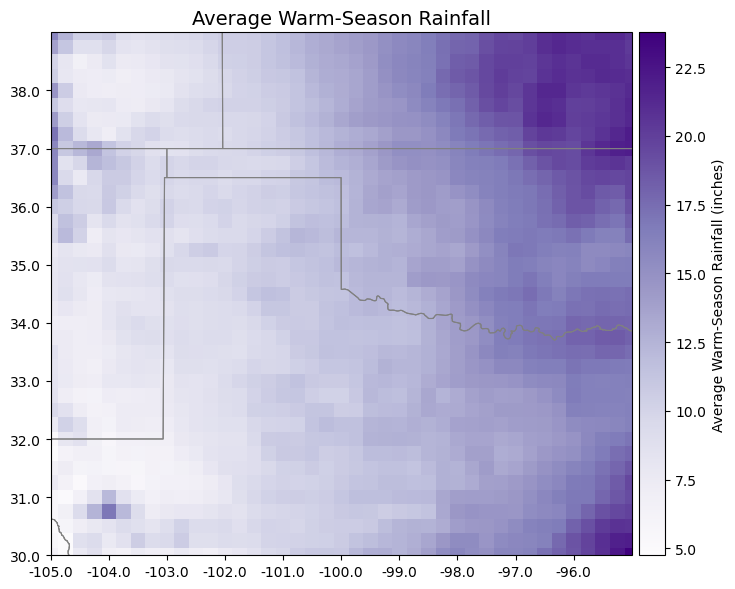

In [173]:
# Generate a 2D grid of latitudes and longitudes.

lats = np.unique(total_rainfall_grid['latitude'])

lons = np.unique(total_rainfall_grid['longitude'])

lon_grid, lat_grid = np.meshgrid(lons, lats)

# Pivot the dataframe to create a 2D array of rainfall values
rainfall_grid = total_rainfall_grid.pivot(index='latitude', columns='longitude', 
                                           values='avg_warm_season_rainfall_inches').values

# Create the figure and Cartopy axis
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Add map features
ax.set_extent([-105, -95, 30, 39], crs=ccrs.PlateCarree())  # Texas region, adjust as needed

ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

ax.add_feature(cfeature.COASTLINE, edgecolor='black')

ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.8, edgecolor='gray')  # Add state borders

# Plot the pcolormesh
pc = ax.pcolormesh(lon_grid, lat_grid, rainfall_grid, cmap='Purples', shading='auto', transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(pc, ax=ax, orientation='vertical', pad=0.01)

cbar.set_label('Average Warm-Season Rainfall (inches)')

# Set the title
ax.set_title('Average Warm-Season Rainfall', fontsize=14)

# Add ticks for longitude and latitude
ax.set_xticks(np.arange(min(lons), max(lons), 1))  # Longitude ticks every 1 degree

ax.set_yticks(np.arange(min(lats), max(lats), 1))  # Latitude ticks every 1 degree

# Set the tick labels
ax.set_xticklabels(np.arange(min(lons), max(lons), 1))

ax.set_yticklabels(np.arange(min(lats), max(lats), 1))

# Show the plot
plt.tight_layout()

plt.show()


In [84]:
# examining proportion of APEs per gridpoint during warm-season

# total days for the warm season (153 days * 18 years)

total_days = 153 * 18

# Group by latitude and longitude, then count True/False in APE column

grouped = ape_df.groupby(['latitude', 'longitude'])

ape_counts = grouped['APE'].value_counts().unstack(fill_value=0)

# Rename columns for clarity (False and True counts)
ape_counts.columns = ['False', 'True']

# Calculate proportion of True values for each grid point
ape_counts['True_proportion'] = (ape_counts['True'] / total_days)*100

# Create a new DataFrame with the latitude, longitude, and True proportions
proportions_df = ape_counts[['True_proportion']].reset_index()

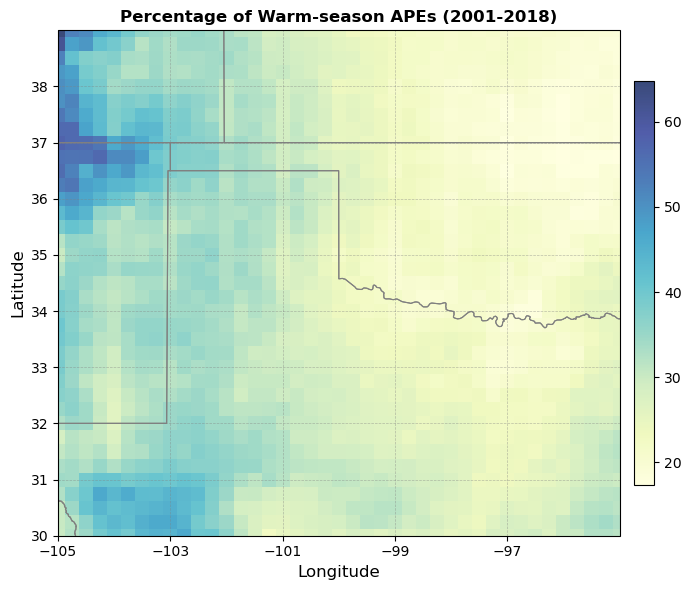

In [122]:
latitudes = proportions_df['latitude'].unique()

longitudes = proportions_df['longitude'].unique()

latitudes = np.sort(latitudes)

longitudes = np.sort(longitudes)

true_proportions_grid = np.full((len(latitudes), len(longitudes)), np.nan)

for idx, row in proportions_df.iterrows():
    
    lat_idx = np.where(latitudes == row['latitude'])[0][0]
    
    lon_idx = np.where(longitudes == row['longitude'])[0][0]
    
    true_proportions_grid[lat_idx, lon_idx] = row['True_proportion']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent of the map based on the longitudes and latitudes range
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()])

# Add features like coastlines, country borders, and state borders
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1.2)

ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray', linewidth=1)

ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.8, edgecolor='gray')  # Add state borders

# Plot the heatmap (swap latitudes and longitudes if needed)
c = ax.pcolormesh(longitudes, latitudes, true_proportions_grid, cmap='YlGnBu', shading='auto', alpha=0.8)

# Add a color bar with a more descriptive label
cbar = fig.colorbar(c, ax=ax, orientation='vertical', shrink=0.8, pad=0.02)

# cbar.set_label('% of APEs', fontsize=12)

# Add a title with a larger font and bold
ax.set_title('Percentage of Warm-season APEs (2001-2018)', fontsize=12, fontweight='bold')

# Optional: Add latitude and longitude ticks for better readability
ax.set_xticks(np.arange(longitudes.min(), longitudes.max(), step=2))

ax.set_yticks(np.arange(latitudes.min(), latitudes.max(), step=1))

# Label the axes with larger, readable font
ax.set_xlabel('Longitude', fontsize=12)

ax.set_ylabel('Latitude', fontsize=12)

# Add gridlines for better readability
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Show the plot
plt.tight_layout()

plt.show()


In [99]:
all_apes = ape_df[ape_df['APE'] == True]

In [109]:
def mean_of_arrays(arrays):
    
    stacked = np.stack(arrays)  # Stack all arrays into a 2D array
    
    return np.nanmean(stacked, axis=0)  # Compute mean, ignoring NaNs

all_apes = all_apes.copy()

all_apes['lon_bin'] = np.floor(all_apes['longitude'])  # Example: -104.7 → -105

lon_diurnal_cycle = all_apes.groupby('lon_bin')['daily_precip'].apply(mean_of_arrays)

lon_diurnal_cycle = lon_diurnal_cycle.reset_index()

lon_diurnal_cycle.rename(columns={'lon_bin': 'longitude_range'}, inplace=True)

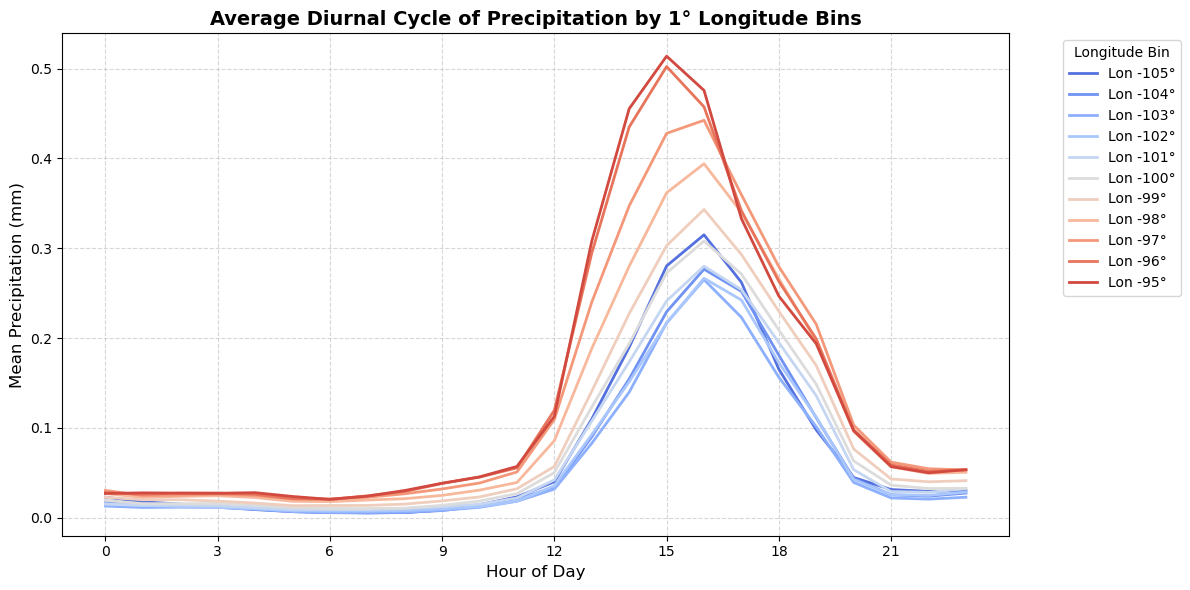

In [110]:
# --- PLOTTING ---

hours = np.arange(24)

plt.figure(figsize=(12, 6))

colors = sns.color_palette("coolwarm", len(lon_diurnal_cycle))

# Loop over each longitude range and plot its average diurnal cycle
for idx, row in lon_diurnal_cycle.iterrows():
    
    longitude_range = row['longitude_range']
    
    avg_diurnal_precip = row['daily_precip']  # This is a 24-hour mean array

    plt.plot(hours, avg_diurnal_precip, label=f'Lon {int(longitude_range)}°', color=colors[idx], linewidth=2)

# Improve aesthetics
plt.xlabel("Hour of Day", fontsize=12)

plt.ylabel("Mean Precipitation (mm)", fontsize=12)

plt.title("Average Diurnal Cycle of Precipitation by 1° Longitude Bins", fontsize=14, fontweight='bold')

plt.xticks(np.arange(0, 24, 3))  # Show ticks every 3 hours

plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability

plt.legend(title="Longitude Bin", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside

plt.tight_layout()  # Adjust layout to fit labels well

plt.show()